# Clustering based on the [car evaluation dataset](https://github.com/hhaji/Applied-Machine-Learning/blob/master/Recitation-Assignments/Assignments_Data/Assignment_Set_13_Data.csv)
by [Zahra Taheri](https://github.com/zata213/Applied_Machine_Learning_S20_Assignments) (19 June 2020)

##### Import libraries

In [1]:
#For some basic operations
import numpy as np
import pandas as pd

#For visualizations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

##### Reading the dataset

In [2]:
#1) Download the dataset by URL and use it directly
#url='https://raw.githubusercontent.com/hhaji/Applied-Machine-Learning/master/Recitation-Assignments/Assignments_Data/Assignment_Set_13_Data.csv'
#data1 = pd.read_csv(url,header=None,names=['buying','maint','doors','persons','lug_boot','safety','class'])

#Write downloaded dataset to a csv file
#data1.to_csv('car_evaluation.csv')

#2) Read and prepare downloaded data from PC
data2=pd.read_csv('car_evaluation.csv')
data=data2.drop(data2.columns[0],axis=1)
print(data.shape)

(1728, 7)


In [3]:
data.head(7)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
# determining the target
data['class'],class_names = pd.factorize(data['class'])
print(class_names)
print(data['class'].unique())

y_true = data.iloc[:,-1]

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]


In [6]:
data1=data.drop(['class'] , axis = 1)
data2=data1
data1.head(7)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
5,vhigh,vhigh,2,2,med,high
6,vhigh,vhigh,2,2,big,low


## Clustering

### Kmeans 
Partitional Clustering: A division data objects into subsets (clusters) such that each data object is in exactly one
subset

### No. of clusters= 4

#### 1. Clustering after encoding categorical features using factorize method of the pandas library

In [7]:
data2['buying'],_ = pd.factorize(data2['buying'])
data2['maint'],_ = pd.factorize(data2['maint'])
data2['doors'],_ = pd.factorize(data2['doors'])
data2['persons'],_ = pd.factorize(data2['persons'])
data2['lug_boot'],_ = pd.factorize(data2['lug_boot'])
data2['safety'],_ = pd.factorize(data2['safety'])
data2.head()

,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
dtypes: int64(6)
memory usage: 81.1 KB


In [9]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler()
X2 = std_scale.fit_transform(data2)

In [10]:
from sklearn.cluster import KMeans

kmeans4_1 = KMeans(n_clusters=4, random_state=42)
kmeans4_1.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [11]:
kmeans4_1.cluster_centers_

array([[-2.31296463e-18, -9.68962790e-01,  1.49071198e-01,
         8.16496581e-01,  0.00000000e+00,  0.00000000e+00],
       [-2.31296463e-18,  9.68962790e-01, -1.49071198e-01,
         8.16496581e-01,  0.00000000e+00,  0.00000000e+00],
       [-2.31296463e-18, -1.49071198e-01, -9.68962790e-01,
        -8.16496581e-01,  0.00000000e+00,  0.00000000e+00],
       [-2.31296463e-18,  1.49071198e-01,  9.68962790e-01,
        -8.16496581e-01,  0.00000000e+00,  0.00000000e+00]])

In [12]:
kmeans4_1.inertia_

7555.2

In [13]:
y_pred= kmeans4_1.labels_

**Based on an [answer](https://datascience.stackexchange.com/a/64208/94666) in  the [datascience.stackexchange](https://datascience.stackexchange.com/), when we have the true labels and the no. of clusters is equal to the no. of unique true labels, a possibility to check the performance of the clustering is as follows:**

In [14]:
from scipy.optimize import linear_sum_assignment

def cluster_acc(y_true, y_pred):
    y_true = y_true.astype(np.int64) #y_true: true labels
    assert y_pred.size == y_true.size  #y_pred: predicted labels obtained from clustering
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    ind = linear_sum_assignment(w.max() - w)
    ind = np.asarray(ind)
    ind = np.transpose(ind)
    return sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size

In [15]:
# accuracy of the clustering
cluster_acc(y_true, y_pred)

0.3315972222222222

In [16]:
#labels =kmeans4_1.labels_

# check how many of the samples were correctly labeled
#correct_labels = sum(y_true == labels)
#percent=correct_labels/y_true.size

#print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_true.size))
#print(round(percent,3))

#### 2. Clustering after encoding categorical features using one hot encoder from sklearn

In [17]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 

# encoding categorical variables with one hot encoder
X= OneHotEncoder().fit_transform(data1).toarray()
print(X,'\n', X.shape)

[[1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]] 
 (1728, 21)


In [18]:
#KMeans
from sklearn.cluster import KMeans

k = 4
kmeans4_2 = KMeans(n_clusters=k, n_init=10,algorithm="elkan", random_state=42)
kmeans4_2.fit(X)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [19]:
#%timeit -n 50 KMeans(algorithm="elkan").fit(X)

In [20]:
#%timeit -n 50 KMeans(algorithm="full").fit(X)

In [21]:
y_pred = kmeans4_2.fit_predict(X)
labels = kmeans4_2.labels_
labels

array([0, 0, 0, ..., 2, 2, 2])

In [22]:
y_pred is labels

True

In [23]:
kmeans4_2.cluster_centers_

array([[ 2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         1.00000000e+00, -1.88737914e-15, -1.88737914e-15,
         3.33333333e-01,  3.33333333e-01,  3.33333333e-01,
         3.33333333e-01,  3.33333333e-01,  3.33333333e-01],
       [ 2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
        -1.88737914e-15,  1.00000000e+00, -1.88737914e-15,
         3.33333333e-01,  3.33333333e-01,  3.33333333e-01,
         3.33333333e-01,  3.33333333e-01,  3.33333333e-01],
       [ 2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e

In [24]:
kmeans4_2.inertia_

6000.0

In [25]:
kmeans4_2.score(X)

-6000.0

In [26]:
# accuracy of the clustering
cluster_acc(y_true, y_pred)

0.47164351851851855

In [27]:
#labels = kmeans.labels_

# check how many of the samples were correctly labeled
#correct_labels = sum(y == labels)
#percent=correct_labels/y.size

#print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
#print(round(percent,3))

In [28]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]

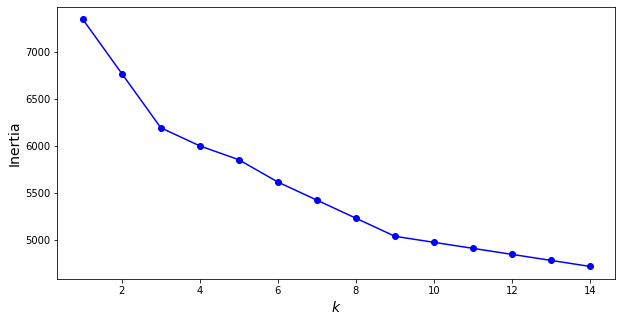

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

In [30]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans4_2.labels_)

0.08650749399710529

In [31]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

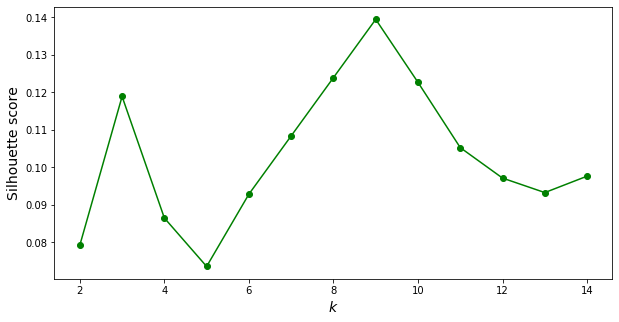

In [32]:
plt.figure(figsize=(10,5))
plt.plot(range(2,15), silhouette_scores, "go-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

### No. of clusters= 3

In [33]:
k = 3
kmeans3_2 = KMeans(n_clusters=k, n_init=10,algorithm="full", random_state=42)
kmeans3_2.fit(X)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [34]:
y_pred = kmeans3_2.fit_predict(X)
labels = kmeans3_2.labels_
labels

array([2, 1, 0, ..., 2, 1, 0])

In [35]:
kmeans3_2.inertia_

6192.000000000002

In [36]:
silhouette_score(X, kmeans3_2.labels_)

0.11891384759606478

### No. of clusters= 100

In [37]:
k = 100
kmeans100_2 = KMeans(n_clusters=k, n_init=10,algorithm="full", random_state=42)
kmeans100_2.fit(X)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [38]:
y_pred = kmeans100_2.fit_predict(X)
labels = kmeans100_2.labels_
labels

array([36, 60, 85, ..., 35, 50, 40])

In [39]:
kmeans100_2.inertia_

3039.5239509397447

In [40]:
silhouette_score(X, kmeans100_2.labels_)

0.10468849495065141

### Mini-Batch K-Means

In [41]:
from sklearn.cluster import MiniBatchKMeans

In [42]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=4, max_iter=300, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=300, max_no_improvement=10,
                n_clusters=4, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [43]:
y_pred=minibatch_kmeans.labels_

In [44]:
minibatch_kmeans.inertia_

6030.614694432427

In [45]:
# accuracy of the clustering
cluster_acc(y_true, y_pred)

0.32233796296296297

### Hierarchical clustering
A set of nested clusters organized as a hierarchical tree

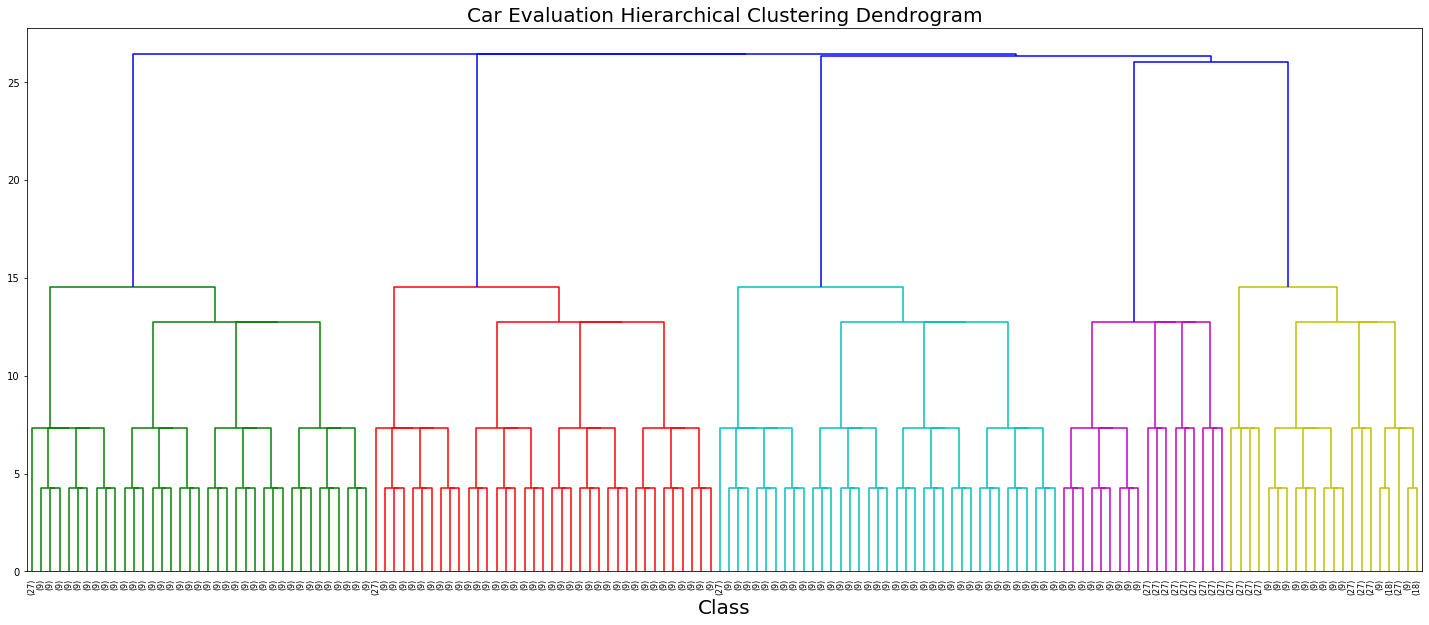

In [46]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward')
plt.figure(figsize=(25,10))
plt.title('Car Evaluation Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Class', fontsize=20)
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=150,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,      
)
plt.show()

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

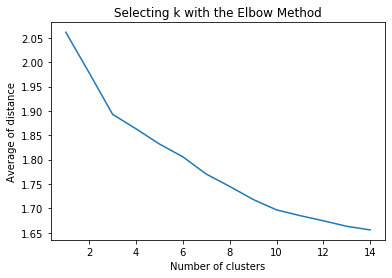

In [47]:
# k-means cluster, 1-15 clusters                                              
from scipy.spatial.distance import cdist

clusters=range(1,15)
meandist=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X)
    meandist.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1))
    / X.shape[0])
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average of distance')
plt.title('Selecting k with the Elbow Method') 

### Kmeans with No. of clusters= 5

In [48]:
k = 5
kmeans5_2 = KMeans(n_clusters=k, n_init=10,algorithm="full", random_state=42)
kmeans5_2.fit(X)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [49]:
y_pred_km5 = kmeans5_2.fit_predict(X)
labels = kmeans5_2.labels_
labels

array([0, 4, 4, ..., 2, 2, 2])

In [50]:
kmeans5_2.inertia_

5837.257142857144

In [51]:
silhouette_score(X, kmeans5_2.labels_)

0.08550773517597794

In [52]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [53]:
silhouette_score(X, hc.labels_)

0.09779777652153311

In [54]:
# accuracy of the clustering
cluster_acc(y_hc, y_pred_km5)

0.2013888888888889

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [55]:
from sklearn.neighbors import NearestNeighbors

#X3 = std_scale.fit_transform(X)
neigh = NearestNeighbors(n_neighbors=9,metric='cosine')
nbrs = neigh.fit(X2)
distances, indices = nbrs.kneighbors(X2)
distances

array([[0.        , 0.04024008, 0.04024008, ..., 0.07886763, 0.07911316,
        0.07911316],
       [0.        , 0.04733898, 0.04733898, ..., 0.0921587 , 0.0921587 ,
        0.0921587 ],
       [0.        , 0.04024008, 0.04024008, ..., 0.07886763, 0.07911316,
        0.07911316],
       ...,
       [0.        , 0.04024008, 0.04024008, ..., 0.07886763, 0.07911316,
        0.07911316],
       [0.        , 0.04733898, 0.04733898, ..., 0.0921587 , 0.0921587 ,
        0.0921587 ],
       [0.        , 0.04024008, 0.04024008, ..., 0.07886763, 0.07911316,
        0.07911316]])

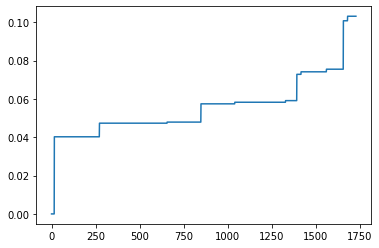

In [56]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
#plt.axis([0, 1000, -1, 1])
plt.plot(distances)
plt.show()

In [57]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.01, min_samples=10)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.01, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [58]:
dbscan.labels_[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [59]:
len(dbscan.core_sample_indices_)

0

In [60]:
dbscan.core_sample_indices_[:10]

array([], dtype=int64)

In [61]:
dbscan.components_[:3]

array([], shape=(0, 21), dtype=float64)

In [62]:
np.unique(dbscan.labels_)

array([-1], dtype=int64)

In [63]:
dbscan2 = DBSCAN(eps=0.5)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [64]:
dbscan2.labels_[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [65]:
len(dbscan2.core_sample_indices_)

0

In [66]:
dbscan2.core_sample_indices_[:10]

array([], dtype=int64)

In [67]:
dbscan2.components_[:3]

array([], shape=(0, 21), dtype=float64)

In [68]:
np.unique(dbscan2.labels_)

array([-1], dtype=int64)

## Using Clustering for Preprocessing

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

In [70]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression Classifier

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(max_iter=3000,random_state=0, solver='lbfgs', multi_class='multinomial')

log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)
print(log_clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9277456647398844


#### using K-Means as a preprocessing step

In [72]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=100, random_state=42)),
    ("log_clf", LogisticRegression(max_iter=3000,random_state=0, solver='lbfgs', multi_class='multinomial')),
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=100, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=3000,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [73]:
pipeline.score(X_test, y_test)

0.9421965317919075